In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from collections import Counter
from sklearn.cross_validation import train_test_split, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc, roc_auc_score, accuracy_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
from util.isoelectric_point import isoelectric_points

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X = (X - X.mean(axis=0)) / X.std(axis=0)



In [5]:
#Chalk Talk Time!
#We're almost ready for training a machine learning model to classify the unknown hosts based on their sequence.
#Here's the proper procedure.
#Split the labelled data into a training and testing set. (~70 train/30 test to 80 train/20 test)
#Train and evaluate a model on the training set.
#Make predictions on the testing set, evaluate the model on testing set accuracy.
#This procedure is known as cross-validation, and is a powerful, yet cheap & easy method for evaluating how good a particular supervised learning model works.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Train a Random Forest Classifier.
# Note: This cell takes a while; any questions?

# Initialize the classifier object.
clf = RandomForestClassifier()

# Train (i.e. "fit") the classifier to the training Xs and Ys
clf.fit(X_train, y_train)

# Make predictions on the test X
y_preds = clf.predict(X_test)
y_preds
print(y_train)
print(y_test)

[1 1 2 1 2 2 3 2 1 3 2 2 1 1 1 1 1 3 3 2 3 2 2 2 2 1 2 1 2 2 3 2 2 2 1 1 2
 3 1 2 2 1 3 3 2 1 2 1 2 3 2 1 1 3 3 2 3 2 3 2 1 3 3 2 1 2 2 1 2 1 2 3 1 2
 1 2 3 2 1 3 3 2 1 2 1 2 1 1 3 3 3 3 2 1 1 3 2 3 3 2 2 1 2 1 2 3 2 1 2 2 1
 3 2 2 3 1 1 3 1 2 2 3 2 1 2 3 3 1 1 3 2 3 2 2 1 2 2 2 1 1 3 2]
[1 1 2 1 3 2 2 3 3 1 2 2 3 1 3 3 2 1 1 3 1 1 1 3 1 1 3 1 2 2 1 2 3 3 2 2]


In [7]:
# Let's first take a look at the accuracy score: the fraction that were classified correctly.
accuracy_score(y_test, y_preds)

0.94444444444444442

How do we interpret what the classifier learned?
Depending on the classifier used, you can peer inside the model to get a feel for what the classifier learned about the features that best predict the class label.
The RandomForestClassifier provides a feature_importances_ attribute that we can access and plot.

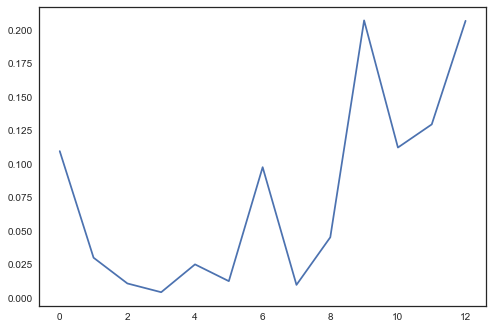

In [8]:
plt.plot(clf.feature_importances_)

In [9]:
#Hands-On Exercises¶
#Now that you've seen the coding pattern for classification using the RandomForestClassifier, try it out for the DecisionTreeClassifier, evaluate its accuracy, and if applicable, try doing the "peering inside" of the model.
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [10]:
preds = clf2.predict(X_test)
preds

array([1, 1, 2, 1, 3, 1, 2, 3, 3, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 3, 1, 1, 1,
       3, 1, 1, 1, 1, 2, 2, 1, 2, 3, 3, 2, 2])

In [11]:
accuracy_score(preds, y_test)

0.94444444444444442

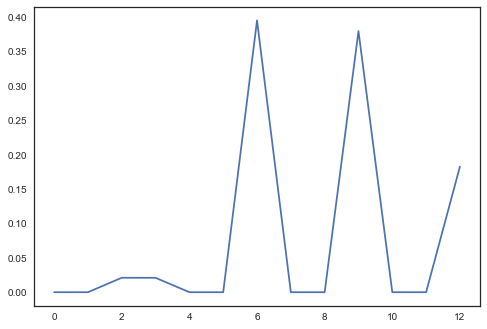

In [20]:
plt.plot(clf2.tree_.compute_feature_importances())

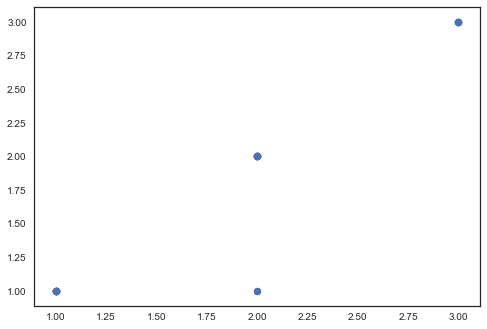

In [22]:
plt.scatter(preds, y_test)

In [25]:
df_wine.head

<bound method DataFrame.head of      0      1     2     3     4    5     6     7     8     9          10  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.640000   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.380000   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.680000   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.800000   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.320000   
5     1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.750000   
6     1  14.39  1.87  2.45  14.6   96  2.50  2.52  0.30  1.98   5.250000   
7     1  14.06  2.15  2.61  17.6  121  2.60  2.51  0.31  1.25   5.050000   
8     1  14.83  1.64  2.17  14.0   97  2.80  2.98  0.29  1.98   5.200000   
9     1  13.86  1.35  2.27  16.0   98  2.98  3.15  0.22  1.85   7.220000   
10    1  14.10  2.16  2.30  18.0  105  2.95  3.32  0.22  2.38   5.750000   
11    1  14.12  1.48  2.32  16.8   95  2.20  2.43  0.26 